In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from stat_analyzer.eda import (
    load_data,
    list_columns,
    basic_info,
    numerical_summary,
    categorical_summary,
    correlation_matrix,
)

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

In [5]:
df = load_data()
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
basic_info(df)

Shape: (16598, 11)

Dtypes:
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Missing values per column:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [7]:
cols_info = list_columns(df)
cols_info

,column,dtype
0,Rank,int64
1,Name,object
2,Platform,object
3,Year,float64
4,Genre,object
5,Publisher,object
6,NA_Sales,float64
7,EU_Sales,float64
8,JP_Sales,float64
9,Other_Sales,float64


In [8]:
num_summary = numerical_summary(df)
num_summary

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [9]:
cat_summary = categorical_summary(df, top_n=5)
for col, vc in cat_summary.items():
    print(f"\nКолонка: {col}")
    display(vc)


Колонка: Name


Name
Need for Speed: Most Wanted    12
LEGO Marvel Super Heroes        9
Ratatouille                     9
Madden NFL 07                   9
FIFA 14                         9
Name: count, dtype: int64


Колонка: Platform


Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: count, dtype: int64


Колонка: Genre


Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: count, dtype: int64


Колонка: Publisher


Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
Name: count, dtype: int64

In [10]:
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
missing_pct[missing_pct > 0].head(20)

Year         1.632727
Publisher    0.349440
dtype: float64

In [11]:
df_clean = df.copy()
key_cols = [c for c in ["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales"] if c in df_clean.columns]
if key_cols:
    df_clean = df_clean.dropna(subset=key_cols, how="all")
df_clean.shape

(16598, 11)

In [12]:
corr = correlation_matrix(df_clean)
corr

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


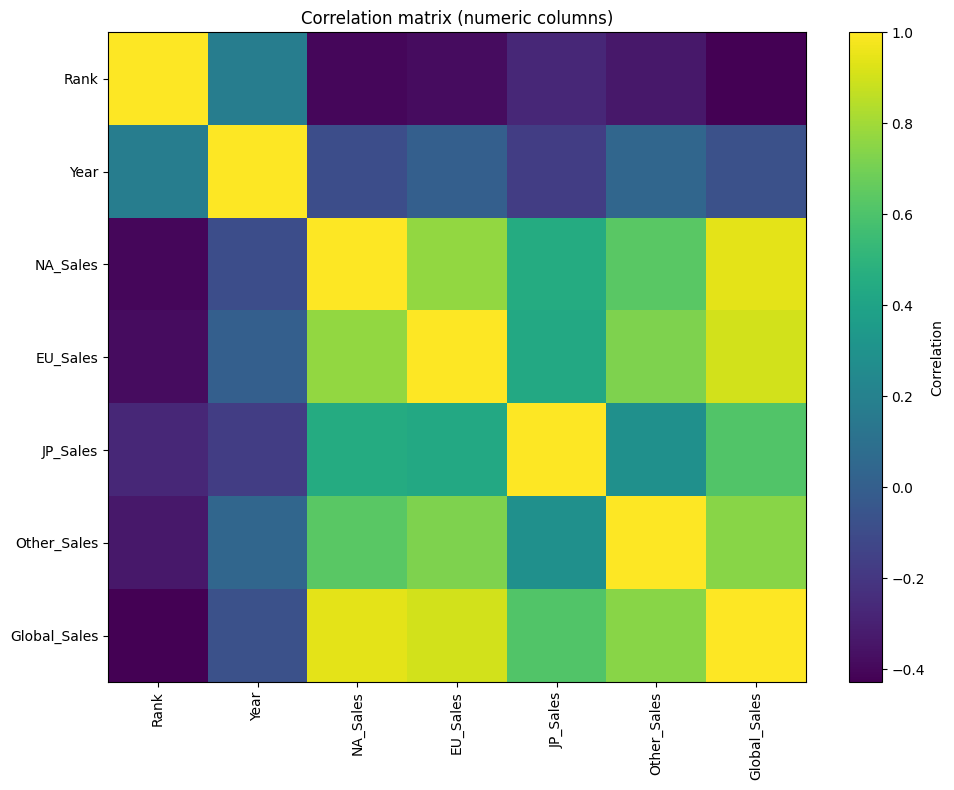

In [13]:
corr = corr.fillna(0)

plt.figure(figsize=(10, 8))
plt.imshow(corr.values, aspect="auto")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar(label="Correlation")
plt.title("Correlation matrix (numeric columns)")
plt.tight_layout()
plt.show()